### 2) Написать программу, которая собирает «Хиты продаж» с сайтов техники mvideo, onlinetrade и складывает данные в БД. Магазины можно выбрать свои. Главный критерий выбора: динамически загружаемые товары

In [1]:
from selenium import webdriver          #Основной элемент
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import Select, WebDriverWait   # Select - Поле множественного выбора
from selenium.webdriver.common.by import By  #используем Селениум
from selenium.webdriver.common.keys import Keys    #Клавиши клавиатуры
from selenium.webdriver.common.action_chains import ActionChains
import pprint
from pymongo import MongoClient
import time

In [2]:
link_mvideo = "https://www.mvideo.ru/"
link_onlinetrade = ""

In [3]:
driver = webdriver.Chrome()   #Движок Хрома
driver.get(link_mvideo)

In [4]:
flocktories = WebDriverWait(driver, 15).until(EC.presence_of_all_elements_located((By.CLASS_NAME, "flocktory-widget-overlay")))
# flocktories = driver.find_elements_by_class_name("flocktory-widget-overlay")
len(flocktories)

3

In [5]:
driver.switch_to.frame(flocktories[-1].find_element_by_id('fl-212563'))
close_btn = driver.find_element_by_class_name("close")
close_btn.click()
driver.switch_to.default_content()

'<html class="js no-flash history localstorage sessionstorage mediaqueries no-touchevents cssscrollbar" xml:lang="ru-RU" lang="ru-RU"><!--<![endif]--><head><script async="true" type="text/javascript" src="https://sslwidget.criteo.com/event?a=15150&amp;v=5.2.0&amp;p0=e%3Dce%26m%3D%255B%255D&amp;p1=e%3Dvh&amp;p2=e%3Dexd%26site_type%3Dd&amp;p3=e%3Ddis&amp;adce=1&amp;lwid=25ca407f-93d8-4644-a770-bd3db4de956f&amp;tld=mvideo.ru&amp;dtycbr=52546" data-owner="criteo-tag"></script><script type="text/javascript" async="" src="https://www.google-analytics.com/analytics.js"></script><script type="text/javascript" async="" id="topmailru-code" src="https://top-fwz1.mail.ru/js/code.js"></script><script type="text/javascript" async="" src="https://mc.yandex.ru/metrika/watch.js"></script><script src="https://connect.facebook.net/signals/plugins/inferredEvents.js?v=2.8.51" async=""></script><script src="https://connect.facebook.net/signals/config/936085686463624?v=2.8.51&amp;r=stable" async=""></script>
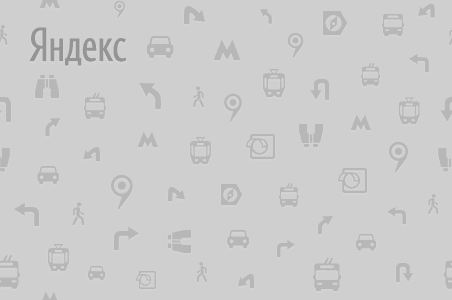
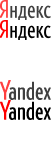
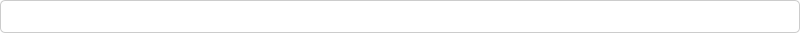
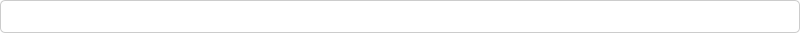
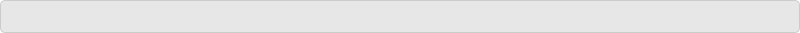
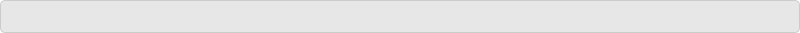
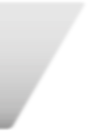
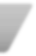
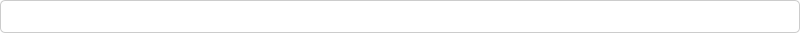
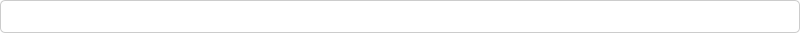
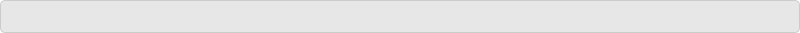
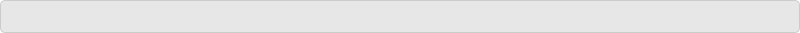
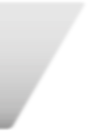
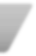
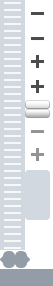
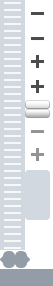
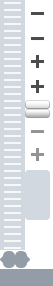
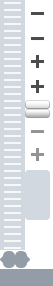
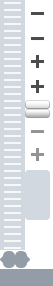
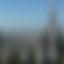

In [6]:
driver.page_source

In [47]:
# ajaxs = driver.find_elements_by_xpath("//div[contains(@data-init, 'ajax-category-carousel')]")
ajaxs = driver.find_elements_by_xpath("//div[contains(@class, 'gallery-layout sel-hits-block')]")
# gallery-layout sel-hits-block 
len(ajaxs)

3

In [45]:
for elem in ajaxs:
    if "Хиты продаж" in elem.get_attribute('innerHTML'):
        hits = elem
        break
#     try:
#         hits = driver.find_element_by_xpath("//*[contains(text(), 'Хиты продаж')]")
        
#     except:
#         pass

In [50]:
ajaxs[2].get_attribute('innerHTML')

'\n            <div class="section">\n                \n                <div class="gallery-content accessories-new " data-sel="new_cart-carousel-gallery_accessories">\n                    \n                    <div class="accessories-carousel-holder carousel tabletSwipe">\n                        <div class="accessories-carousel-wrapper">\n                            <ul class="accessories-product-list" data-init="galleryCarousel" data-init-param="{\n\t\t\t\t\t\t\t\t\t\t&quot;align&quot; : &quot;left&quot;,\n\t\t\t\t\t\t\t\t\t\t&quot;infinite&quot;: false,\n\t\t\t\t\t\t\t\t\t\t&quot;circular&quot;: false,\n\t\t\t\t\t\t\t\t\t\t&quot;scroll&quot;: 800,\n\t\t\t\t\t\t\t\t\t\t&quot;auto&quot; : false,\n\t\t\t\t\t\t\t\t\t\t&quot;ajaxContentLoad&quot; : {\n\t\t\t\t\t\t\t\t\t\t\t&quot;total&quot;:20,\n\t\t\t\t\t\t\t\t\t\t\t&quot;dataIds&quot; : [30043637,20059560,30043700,20054412,30038385,20032256,50052125,10020490,50127103,20055707,50126497,20040889,30036736,20031642,30021264,20059165,30041

In [46]:
hits

0

In [43]:
nexts = 0
next_btn = hits.find_element_by_class_name("sel-hits-button-next")
while True:
    try:
        next_btn.click()
        nexts += 1
        next_btn = WebDriverWait(hits, 15).until(EC.presence_of_element_located((By.CLASS_NAME, "sel-hits-button-next")))
    except:
        print("Всего страниц с хитами:", nexts)
        break
print("vobla")

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":".sel-hits-button-next"}
  (Session info: chrome=75.0.3770.100)


In [9]:
# hits = ajaxs[0]
# next_btn = hits.find_element_by_class_name("sel-hits-button-next")
# prev_btn = hits.find_element_by_class_name("sel-hits-button-prev")

In [10]:
# for i in range(10):
#     time.sleep(1)
#     next_btn.click()
#     time.sleep(1)
#     prev_btn.click()
    

In [11]:
# next_btn.click()

In [12]:
# driver.quit()